In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from bs4 import BeautifulSoup
import os
import csv


font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

<h1> EDA of cat food data <\h1>

In [2]:
pages = range(1,10)
namelinks = {'friskies-tasty-treasures-cheese': 104225,
             'fancy-feast-poultry-beef-classic-pate': 103926,
             'royal-canin-veterinary-diet-urinary': 35160,
             'hills-prescription-diet-cd-multicare': 54783,
             'blue-buffalo-healthy-gourmet-variety': 141486,
             'fancy-feast-delights-cheddar-grilled': 103869,
             'nutro-perfect-portions-grain-free': 155651,
            }

prices = dict(zip(namelinks.keys(),[12.72, 13.21, 49.39, 48.99, 10.98, 15.59, 13.97]))
num_cans = dict(zip(namelinks.keys(),np.array([24, 24, 24, 24, 12, 24, 12])))             
oz_per_can = dict(zip(namelinks.keys(),np.array([5.5, 3, 5.8, 5.5, 3, 3, 2.65])))

basedir = %pwd

In [3]:
columns = ['rating','name','price','num_cans','oz_per_can','review_text']
# df = pd.DataFrame(columns=columns)
# df

In [4]:
try:
    df = pd.read_csv('catfood.csv')
except:
    with open('catfood.csv','w') as cf:
        writer = csv.writer(cf)
        writer.writerow(columns)
        for name in namelinks.keys():
            for pagenum in pages:
                filepath = os.path.join(basedir,f'html_pages/{name}/')
                filepathname = f'{filepath}/page{pagenum}.html'

                file = open(filepathname,'r')
                soup = BeautifulSoup(file,'html')

                for li in soup.find_all(itemprop='review'):
                    rating = float(li.find(itemprop='ratingValue')["content"])
                    review_text = li.find("span", {'class': 'ugc-list__review__display'}).text.strip()
                    writer.writerow([rating, name, prices[name], 
                                     num_cans[name], oz_per_can[name],f'{review_text}'])


# df.loc[name] = np.array([len(ratings),np.mean(ratings),np.median(ratings),np.std(ratings)])

In [6]:
df["price_per_oz"] = np.around(df["price"]/(df["num_cans"]*df["oz_per_can"]),decimals=2)
df["review_length"] = df["review_text"].apply(lambda x: len(str(x)))

pd.set_option('display.max_colwidth', -1)

df.sample(3)

,rating,name,price,num_cans,oz_per_can,review_text,price_per_oz,review_length
277,5.0,hills-prescription-diet-cd-multicare,48.99,24,5.5,"Our big cat had 50 bladder stones, so now use this soft food and the C/D dry food. I use this soft food as a way to administer the laxative our big cat also needs. She suffers from a mega colon and, well, details are not pleasant. Even our other cat will eat this food; being a schizoid Siamese does not like soft foods.",0.37,320
100,5.0,fancy-feast-poultry-beef-classic-pate,13.21,24,3.0,"My cat loves this cat food -she has been a ""meat lover"" since she was a kitten - has no interest in fish. Buying it buy the case is sure better than purchasing all those single cans!",0.18,182
487,5.0,fancy-feast-delights-cheddar-grilled,15.59,24,3.0,We love Fancy Feast! The gravy is the best! It even rates better than fresh mice! Thank you and send more:),0.22,107


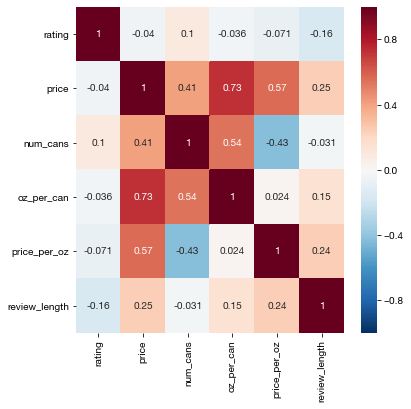

In [7]:
corrvals = df.corr()
shape = corrvals.shape
shape
plt.figure(figsize=shape)

sns.heatmap(corrvals,annot=True,cmap="RdBu_r",vmin=-1,vmax=1)

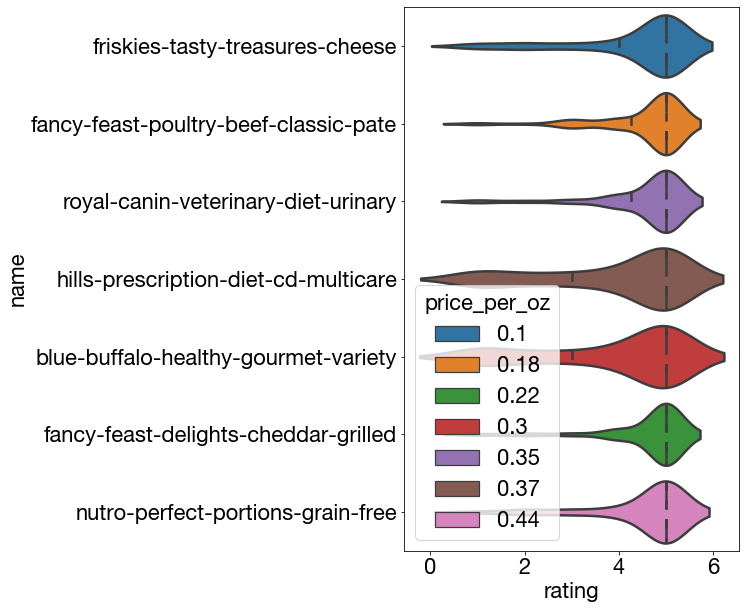

In [14]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(6,10))
ax = sns.violinplot(x='rating',y='name',hue='price_per_oz',inner='quartiles',
                    dodge=False,linewidth=2.5,orient='h',data=df)
plt.savefig('priceratingviolin.png',bbox_inches='tight')

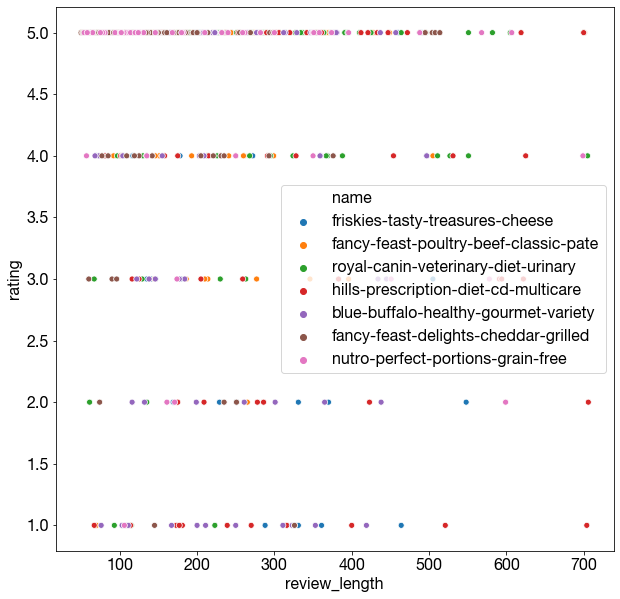

In [152]:
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='review_length',y='rating',hue='name',data=df)
# plt.xticks(rotation=30,ha='right');